In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('/content/moviedata.csv', encoding='ISO-8859-1')

In [18]:
df.head(5)

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [19]:
df.shape

(15509, 10)

In [20]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [21]:
# Alternatively, you can specify 'Unknown' for certain columns directly
df['Name'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Actor 1'].fillna('Unknown', inplace=True)
df['Actor 2'].fillna('Unknown', inplace=True)
df['Actor 3'].fillna('Unknown', inplace=True)


In [22]:
# Replace '-' from 'Year' column and convert to numeric
df['Year'] = df['Year'].astype(str).replace('-', '', regex=True).astype(float)
df['Year'].unique()

array([  nan, 2019., 2021., 2010., 1997., 2005., 2008., 2012., 2014.,
       2004., 2016., 1991., 1990., 2018., 1987., 1948., 1958., 2017.,
       2020., 2009., 2002., 1993., 1946., 1994., 2007., 2013., 2003.,
       1998., 1979., 1951., 1956., 1974., 2015., 2006., 1981., 1985.,
       2011., 2001., 1967., 1988., 1995., 1959., 1996., 1970., 1976.,
       2000., 1999., 1973., 1968., 1943., 1953., 1986., 1983., 1989.,
       1982., 1977., 1957., 1950., 1992., 1969., 1975., 1947., 1972.,
       1971., 1935., 1978., 1960., 1944., 1963., 1940., 1984., 1934.,
       1955., 1936., 1980., 1966., 1949., 1962., 1964., 1952., 1933.,
       1942., 1939., 1954., 1945., 1961., 1965., 1938., 1941., 1931.,
       1937., 2022., 1932., 1923., 1915., 1928., 1922., 1917., 1913.,
       1930., 1926., 1914., 1924.])

In [23]:
df['Year'] = df['Year'].fillna(int(df['Year'].mean()))

In [24]:
df['Duration'] = df['Duration'].astype(str).replace('min', '', regex=True).astype(float)
df['Duration'].unique()

array([ nan, 109.,  90., 110., 105., 147., 142.,  59.,  82., 116.,  96.,
       120., 161., 166., 102.,  87., 132.,  66., 146., 112., 168., 158.,
       126.,  94., 138., 124., 144., 157., 136., 107., 113.,  80., 122.,
       149., 148., 130., 121., 188., 115., 103., 114., 170., 100.,  99.,
       140., 128.,  93., 125., 145.,  75., 111., 134.,  85., 104.,  92.,
       137., 127., 150., 119., 135.,  86.,  76.,  70.,  72., 151.,  95.,
        52.,  89., 143., 177., 117., 123., 154.,  88., 175., 153.,  78.,
       139., 133., 101., 180.,  60.,  46., 164., 162., 171., 160., 152.,
        62., 163., 165., 141., 210., 129., 156., 240., 172., 155., 118.,
       167., 106., 193.,  57., 108.,  45., 195., 174.,  81., 178.,  58.,
       184.,  97.,  98., 131., 176., 169.,  77.,  91.,  84., 173.,  74.,
        67., 181., 300.,  79.,  65.,  48., 183., 159.,  83.,  68.,  49.,
       201.,  64., 186.,  50.,  69., 207.,  55.,  61., 185., 187., 216.,
        63.,  54., 198.,  51.,  71.,  73., 218., 19

In [25]:
df['Duration'] = df['Duration'].fillna(int(df['Duration'].mean()))

In [26]:
df['Rating'] = df['Rating'].fillna(int(df['Rating'].mean()))

In [27]:
df['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [28]:
df['Votes'] = df['Votes'].astype(str).replace(',', '', regex=True)

In [29]:
# Replace string 'nan' with actual NaN
df['Votes'] = df['Votes'].replace('nan', np.nan)

# Remove commas
df['Votes'] = df['Votes'].replace(',', '')

# Convert to numeric (integer), coercing errors to NaN if necessary
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


In [ ]:
df['Votes'] = df['Votes'].fillna(int(df['Votes'].mode()))

<ipython-input-16-b94c6ea1d993>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Votes'] = df['Votes'].fillna(int(df['Votes'].mode()))


In [ ]:
df.head(5)

Name    Year  Duration            Genre  \
0                                      1987.0     128.0            Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0            Drama   
2                         #Homecoming  2021.0      90.0   Drama, Musical   
3                             #Yaaram  2019.0     110.0  Comedy, Romance   
4                   ...And Once Again  2010.0     105.0            Drama   

   Rating  Votes            Director       Actor 1             Actor 2  \
0     5.0    8.0       J.S. Randhawa      Manmauji              Birbal   
1     7.0    8.0       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     5.0    8.0  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4   35.0          Ovais Khan       Prateik          Ishita Raj   
4     5.0    8.0        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [ ]:
df['Name'].unique()

array([' ', '#Gadhvi (He thought he was Gandhi)', '#Homecoming', ...,
       'Zulmi Raj', 'Zulmi Shikari', 'Zulm-O-Sitam'], dtype=object)

In [ ]:
# Replace spaces within string values with an underscore
df.at[0, 'Name'] = df.at[0, 'Name'].replace(' ', 'unknown')


In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df.head(3)

Name    Year  Duration           Genre  \
0                             unknown  1987.0     128.0           Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0           Drama   
2                         #Homecoming  2021.0      90.0  Drama, Musical   

   Rating  Votes            Director       Actor 1            Actor 2  \
0     5.0    8.0       J.S. Randhawa      Manmauji             Birbal   
1     7.0    8.0       Gaurav Bakshi  Rasika Dugal     Vivek Ghamande   
2     5.0    8.0  Soumyajit Majumdar  Sayani Gupta  Plabita Borthakur   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana

In [30]:
#Year with best rating
# Group by 'Year' and calculate the mean rating for each year
average_ratings_by_year = df.groupby('Year')['Rating'].mean()
print(average_ratings_by_year)
# year with the highest average rating
best_year = average_ratings_by_year.idxmax()
best_rating = average_ratings_by_year.max()
print(f"The year with the best rating is {best_year} with an average rating of {best_rating:.2f}.")

Year
1913.0    5.000000
1914.0    5.000000
1915.0    5.000000
1917.0    6.700000
1922.0    5.000000
            ...   
2018.0    5.741995
2019.0    5.800244
2020.0    5.669375
2021.0    5.323469
2022.0    5.000000
Name: Rating, Length: 102, dtype: float64
The year with the best rating is 1917.0 with an average rating of 6.70.


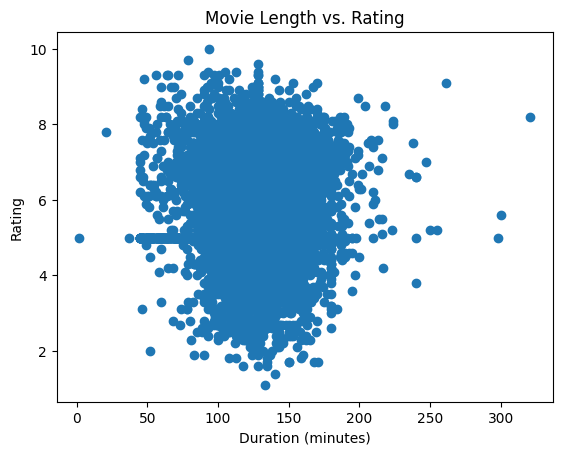

In [31]:
# Does length of movie have any impact with the rating?
import matplotlib.pyplot as plt

plt.scatter(df['Duration'], df['Rating'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('Movie Length vs. Rating')
plt.show()


In [36]:
#Correlation coefficient
correlation = df['Duration'].corr(df['Rating'])
print(f'Correlation coefficient: {correlation:.2f}')


Correlation coefficient: 0.05


In [33]:
# Analysis - correlation is so weak so that it suggests movie length does not have a meaningful impact on the rating and also we can see from scatter plot .

In [37]:
#Top 10 movies according to rating per year and overall.
# Group by year and get the top 10 movies per year
Top_10_per_year = df.groupby('Year').apply(lambda x:x.nlargest(10,'Rating')).reset_index(drop=True)
Top_10_per_year = Top_10_per_year[['Year','Name']]
# top 10 movies overall
Top_10_overall = df.nlargest(10, 'Rating')
Top_10_overall = Top_10_overall[['Year','Name']]
# Display the results
print("Top 10 movies per year:")
print(Top_10_per_year)

print("\nTop 10 movies overall:")
print(Top_10_overall)

Top 10 movies per year:
       Year                        Name
0    1913.0            Mohini Bhasmasur
1    1914.0            Satyavan Savitri
2    1915.0  Death of Narayanrao Peshwa
3    1917.0                 Lanka Dahan
4    1922.0                       Karna
..      ...                         ...
929  2022.0         Battle of Saraighat
930  2022.0                     Bhediya
931  2022.0         Chaalbaaz in London
932  2022.0                      Cirkus
933  2022.0          Ek Villain Returns

[934 rows x 2 columns]

Top 10 movies overall:
         Year                 Name
8339   2020.0      Love Qubool Hai
5410   2021.0           Half Songs
2563   2020.0                Breed
5077   2019.0         Gho Gho Rani
6852   2021.0                 June
11704  2017.0             Ram-Path
14222  2020.0  The Reluctant Crime
1314   2018.0         Ashok Vatika
1729   2021.0             Baikunth
5125   2019.0          God of gods


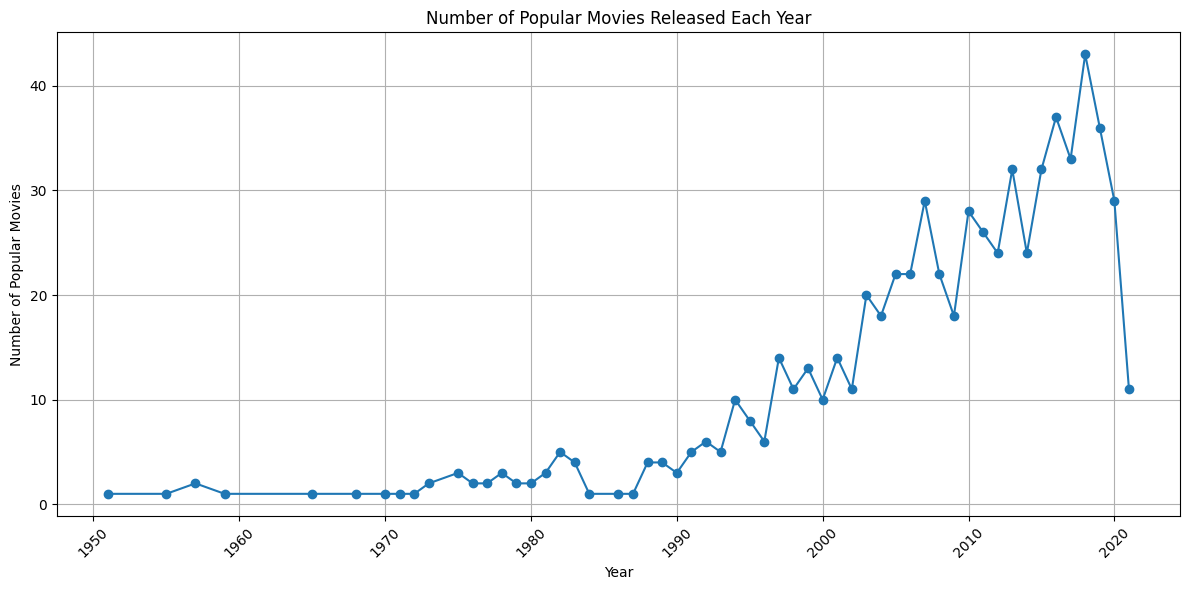

In [38]:
#Number of popular movies released each year.
import math
rating_threshold=math.ceil(df['Rating'].mean())
votes_threshold=math.ceil(df['Votes'].mean())
popular_movies = df[(df['Rating'] >= rating_threshold) & (df['Votes'] > votes_threshold)]
#Popular movies based on rating and votes both
popular_movies = df[(df['Rating']>=rating_threshold)&(df['Votes']>votes_threshold)]
# Groupby Year and count the number of popular movies per year
popular_movies_per_year = popular_movies.groupby('Year').size()
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(popular_movies_per_year.index, popular_movies_per_year.values, marker='o')
plt.title('Number of Popular Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Total number of votes for popular movies: 11560795.0


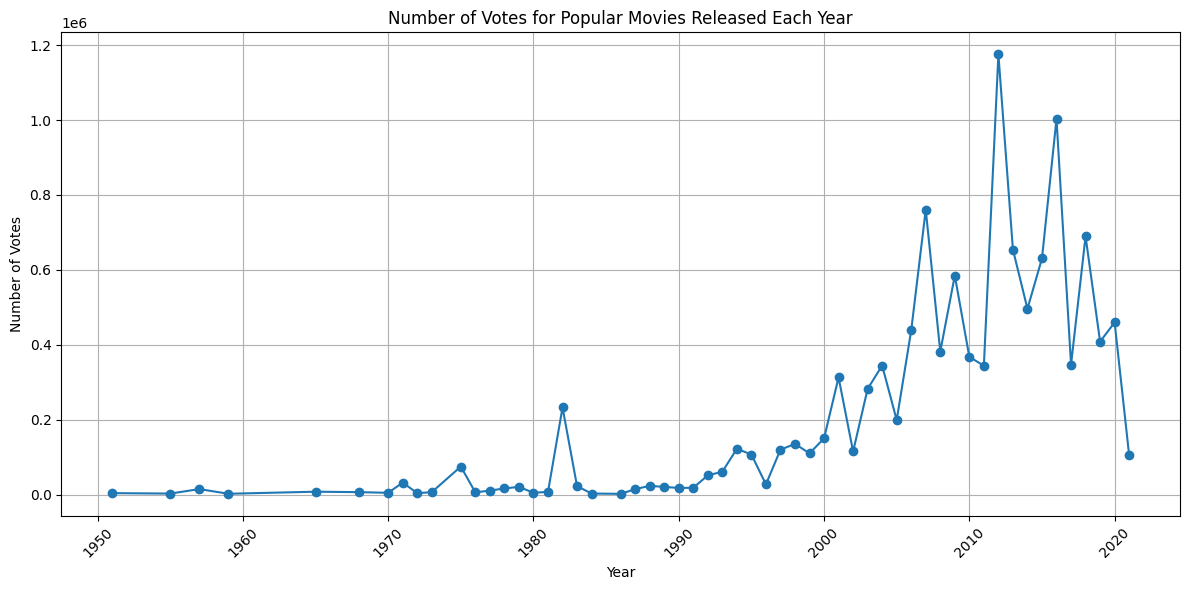

In [39]:
#Counting the number of votes which movies preformed better in rating per year and overall.
# Group by Year and sum the number of votes for popular movies per year
votes_per_year = popular_movies.groupby('Year')['Votes'].sum()

# Calculate the overall number of votes for popular movies
total_votes = popular_movies['Votes'].sum()

# Print the overall number of votes for popular movies
print(f"Total number of votes for popular movies: {total_votes}")

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(votes_per_year.index, votes_per_year.values, marker='o')
plt.title('Number of Votes for Popular Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [ ]:
#Which director directed the most movies
# Group by Director and count the number of movies
director_counts = df.groupby('Director').size()
sorted_director_counts = director_counts.sort_values(ascending=False)

# Identify the director with the second most movies
most_movies_director = sorted_director_counts.index[1]
most_movies_count = sorted_director_counts.iloc[1]

# Display the result
print(f'The director who directed the most movies is {most_movies_director} with {most_movies_count} movies.')


The director who directed the most movies is Jayant Desai with 58 movies.


In [ ]:
#Which actor starred in the movie
#Find actor in a given movie
def find_actors(movie_name):
  movie=df[df['Name']==movie_name]
  if movie.empty:
    return f"Movie '{movie_name}' not found."
  actors=movie[['Actor 1','Actor 2','Actor 3']].values.flatten()
  return actors
movie_name=input("movie_name is : ")
actors = find_actors(movie_name)
print(f'The actors who starred in "{movie_name}" are:')
for actor in actors:
    print(actor)

movie_name is : Homecoming
The actors who starred in "Homecoming" are:
Shankar Aryan
Unknown
Unknown


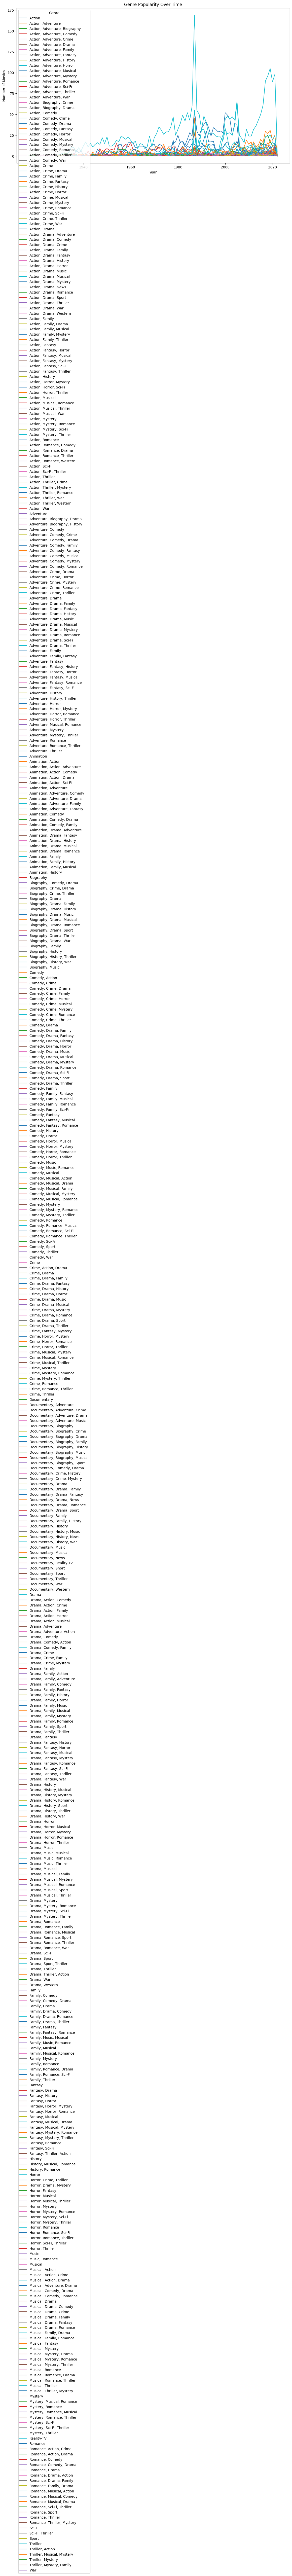

In [ ]:
# Group by Year and Genre, then count the number of movies
genre_trends = df.groupby(['Year', 'Genre']).size().unstack().fillna(0)

# Plotting the trends for each genre
genre_trends.plot(figsize=(14, 8), title='Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


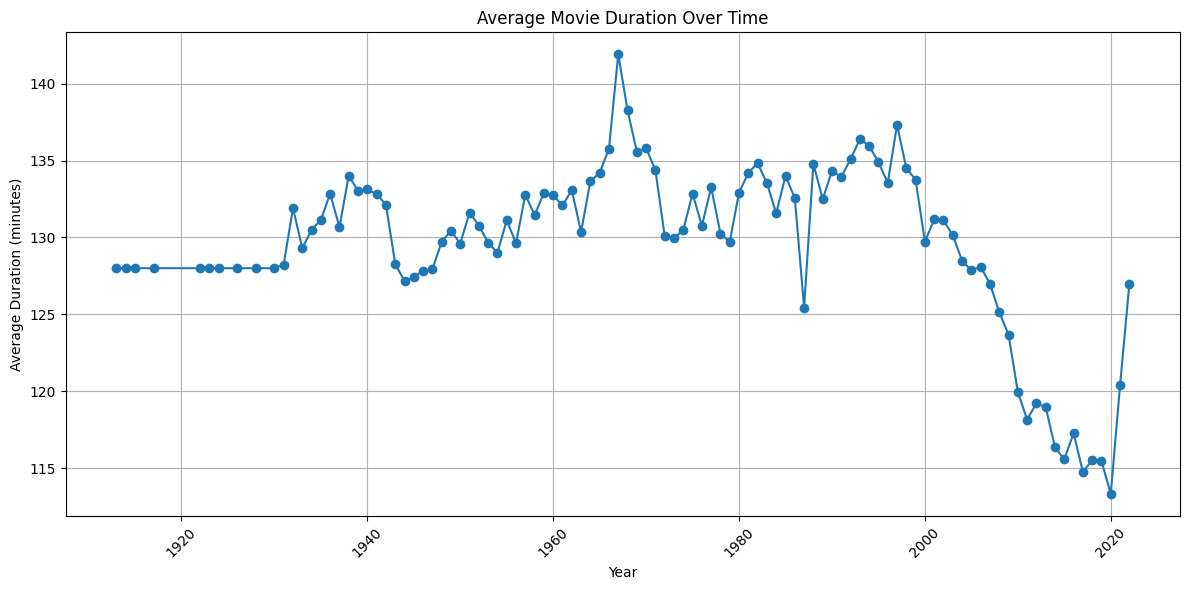

In [40]:
# Group by Year and calculate the average duration
avg_duration_per_year = df.groupby('Year')['Duration'].mean()

# Plotting the average movie duration over time
plt.figure(figsize=(12, 6))
plt.plot(avg_duration_per_year.index, avg_duration_per_year.values, marker='o')
plt.title('Average Movie Duration Over Time')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The year with the highest average rating is 1917.0 with an average rating of 6.7.


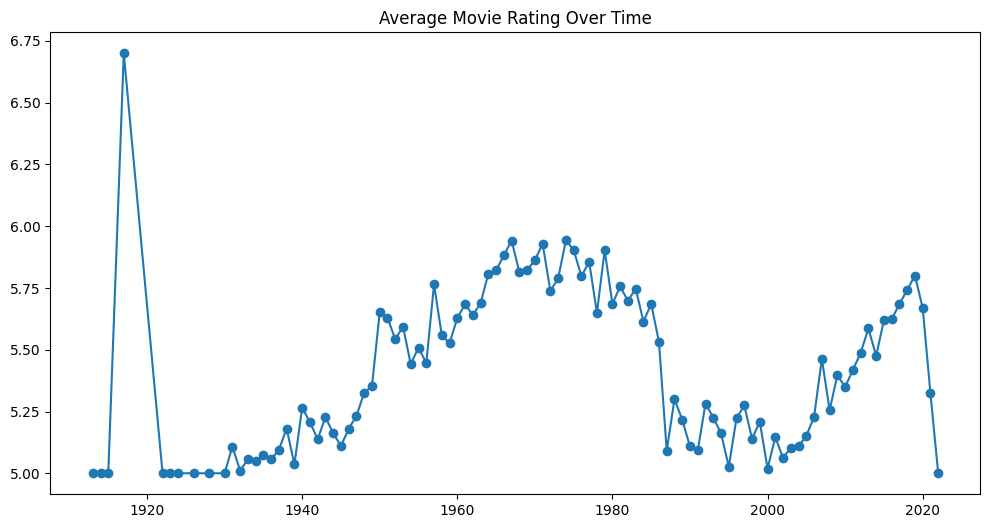

In [46]:
# Group by Year and calculate the average rating
avg_rating_per_year = df.groupby('Year')['Rating'].mean()

# Plotting the average rating over time
plt.figure(figsize=(12, 6))
plt.plot(avg_rating_per_year.index, avg_rating_per_year.values, marker='o')
plt.title('Average Movie Rating Over Time')
max_rating_year = avg_rating_per_year.idxmax()
max_rating_value = avg_rating_per_year.max()

print(f"The year with the highest average rating is {max_rating_year} with an average rating of {max_rating_value}.")


In [47]:
# director and actor collaboration
director_actor_collab = df.groupby(['Director', 'Actor 1']).size()

# Find top collaborations
top_collaborations = director_actor_collab.nlargest(10)
print(top_collaborations)


Director                  Actor 1                  
Unknown                   Unknown                      525
Abbas Alibhai Burmawalla  Mastan Alibhai Burmawalla     22
Shyam Ramsay              Tulsi Ramsay                  21
Rajiv Chilaka             Unknown                       19
Shakeela                  Unknown                       18
Master Bhagwan            Master Bhagwan                17
Dev Anand                 Dev Anand                     15
T.L.V. Prasad             Mithun Chakraborty            14
Bhimsain                  Unknown                       13
Kanti Shah                Sapna Sappu                   13
dtype: int64


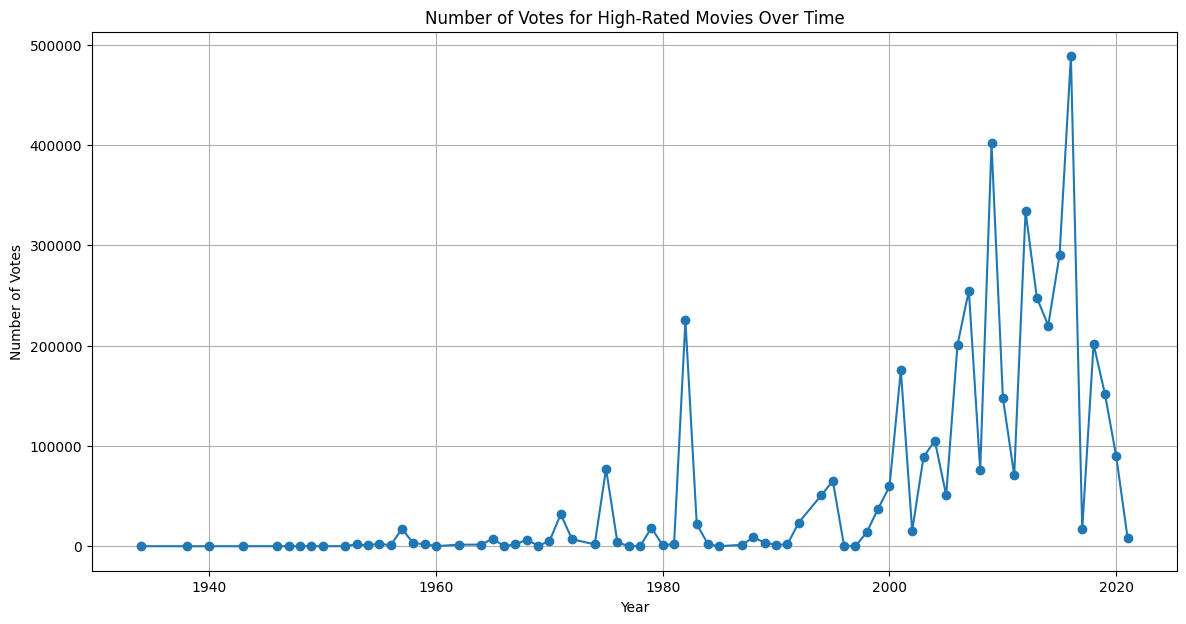

In [48]:
high_rating_movies = df[df['Rating'] >= 8]  # Example threshold

# Sum of votes for high-rated movies per year
votes_by_year = high_rating_movies.groupby('Year')['Votes'].sum()

# Plotting
votes_by_year.plot(kind='line', figsize=(14, 7), marker='o')
plt.title('Number of Votes for High-Rated Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.show()


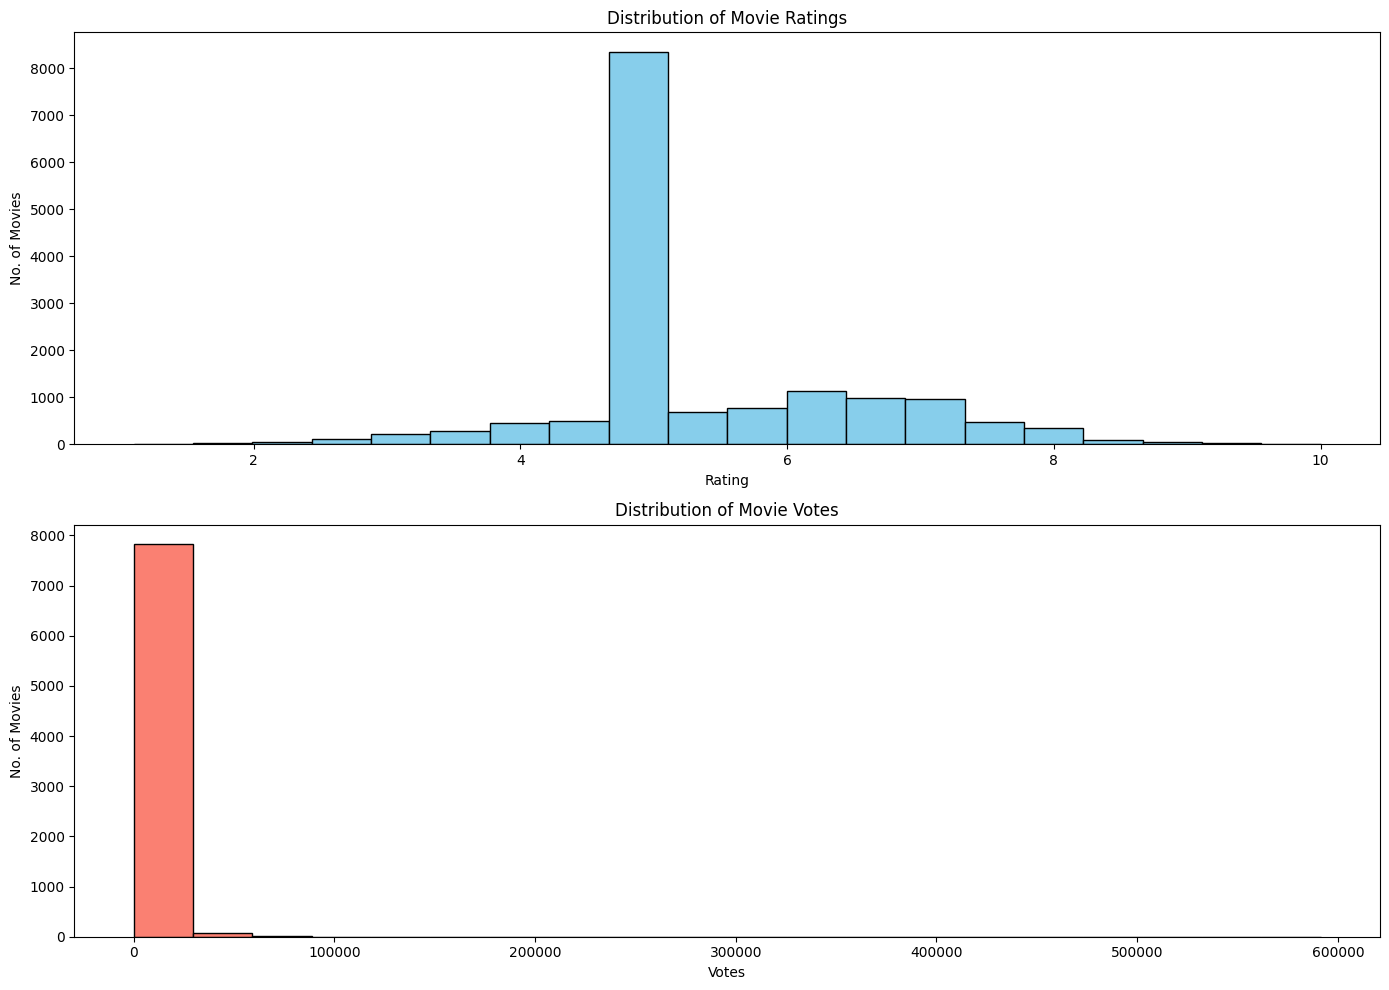

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Rating distribution
ax[0].hist(df['Rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Movie Ratings')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('No. of Movies')

# Votes distribution
ax[1].hist(df['Votes'].dropna(), bins=20, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Movie Votes')
ax[1].set_xlabel('Votes')
ax[1].set_ylabel('No. of Movies')

plt.tight_layout()
plt.show()



Director Output and Movie Success

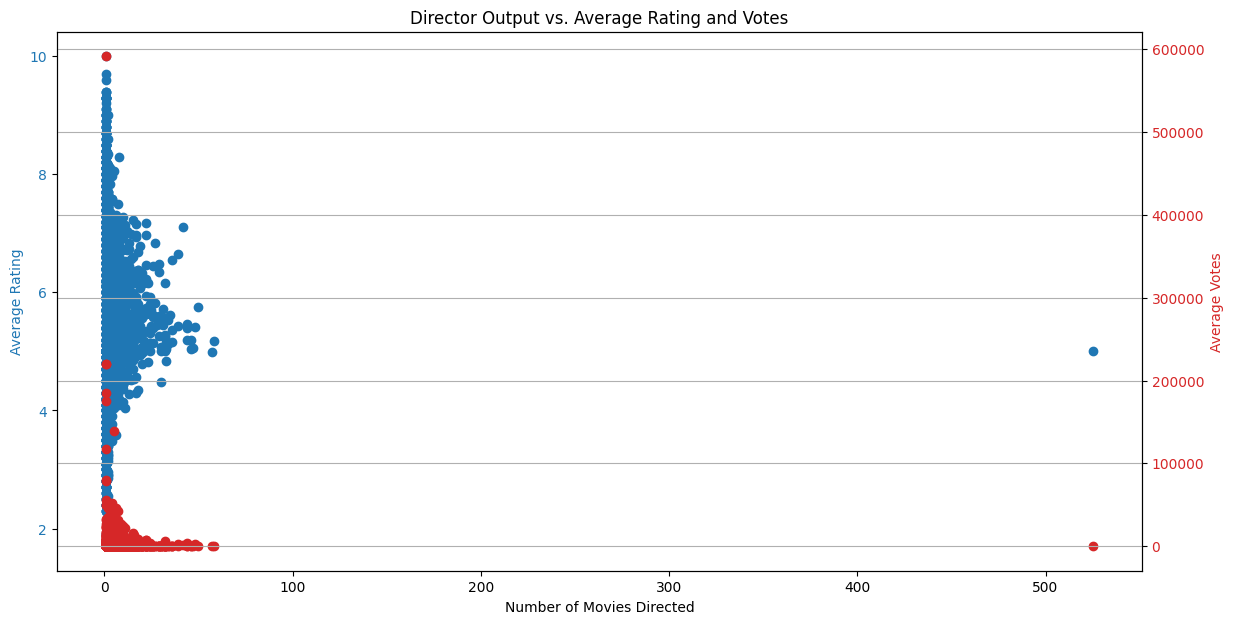

In [50]:
# Calculate average rating and votes per director
director_success = df.groupby('Director').agg({'Rating': 'mean', 'Votes': 'mean', 'Name': 'count'})
director_success.columns = ['Average_Rating', 'Average_Votes', 'Number_of_Movies']

# Plot average rating and votes vs. number of movies
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Number of Movies Directed')
ax1.set_ylabel('Average Rating', color=color)
ax1.scatter(director_success['Number_of_Movies'], director_success['Average_Rating'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Votes', color=color)
ax2.scatter(director_success['Number_of_Movies'], director_success['Average_Votes'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Director Output vs. Average Rating and Votes')
plt.grid(True)
plt.show()


Trends in Vote vs Movie Duration

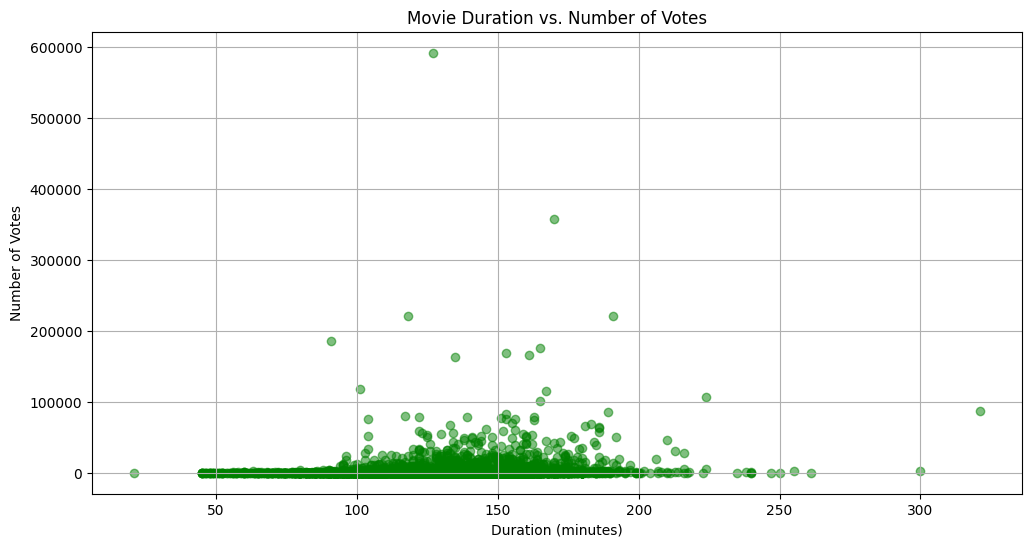

In [51]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Duration'], df['Votes'], alpha=0.5, color='green')
plt.title('Movie Duration vs. Number of Votes')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.show()


Genre and Duration trend


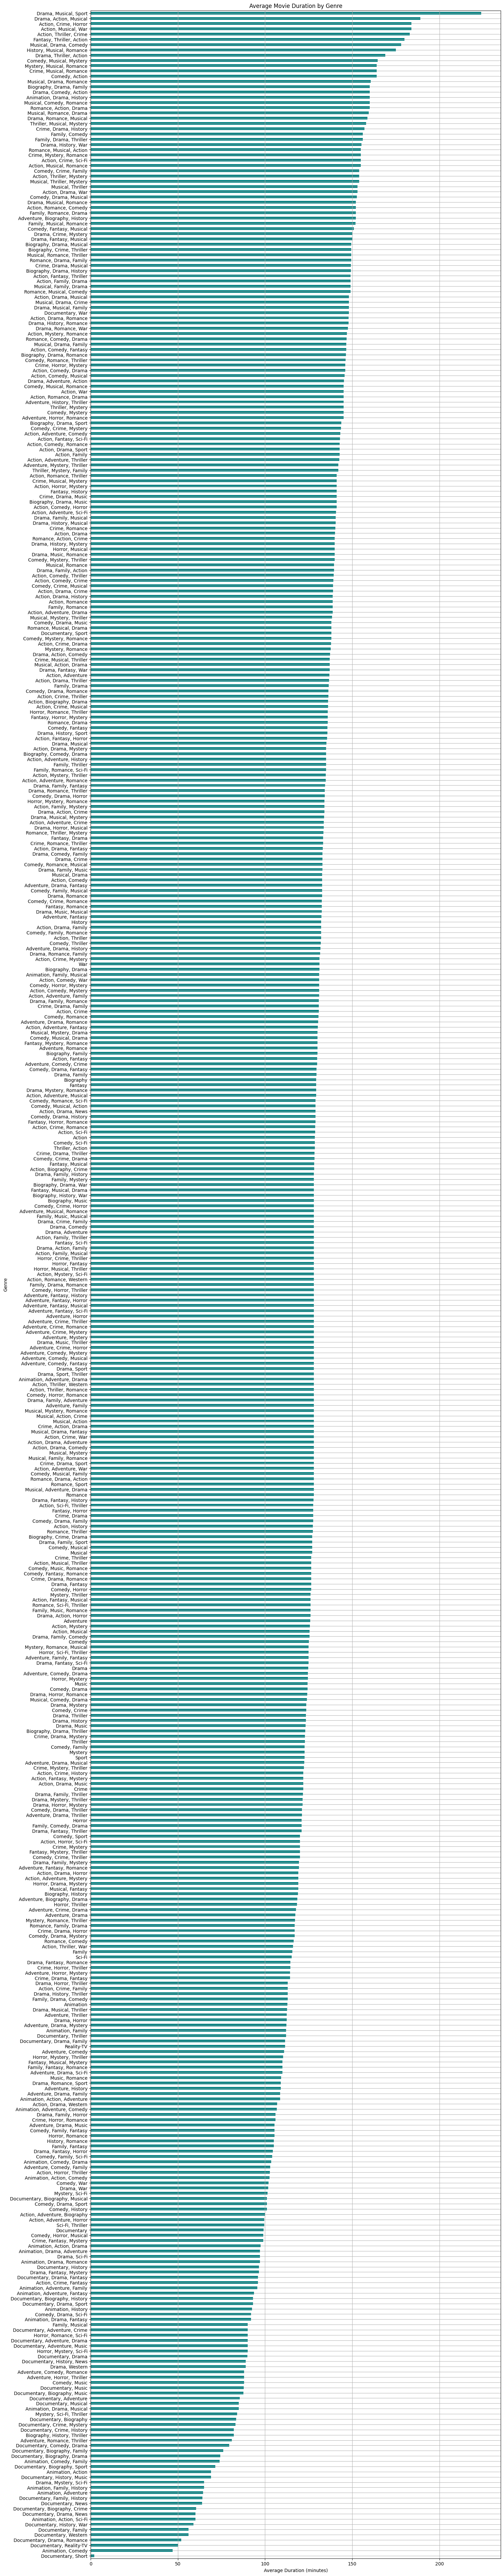

In [53]:
# Plot average movie duration by genre
avg_duration_by_genre = df.groupby('Genre')['Duration'].mean().sort_values()

avg_duration_by_genre.plot(kind='barh', figsize=(16, 100), color='teal')
plt.title('Average Movie Duration by Genre')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.grid(True)
plt.show()


Analysis

In [ ]:
## Analysis - correlation is so weak so that it suggests movie length does not have a meaningful impact on the rating and also we can see from scatter plot .
# In 2017 maximum number of popular movies released . Popular movies on the basis of ratings and votes .
# In 2012 total no. of votes for popular movies is maximum . Total number of votes for popular movies: 11560795.0
# The director who directed the most movies is Jayant Desai with 58 movies.
# In 1967 movie length was maximum basis on average of duration.
#The year with the highest average rating is 1917.0 with an average rating of 6.7.
# In 2016 number of votes for high-rated movie is maximum . Rating >8
# We can see Drama , Musical and Sport (Genre) has average duration is maximum.
# We can see maximum no. of movies has rating approx to 5.